In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# to display all rows
pd.set_option('display.max_rows',None)

# TO DISPLAY ALL COLUMNS
pd.set_option('display.max_columns', None) 

In [76]:
data = pd.read_csv('Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [77]:
data.shape

(7043, 21)

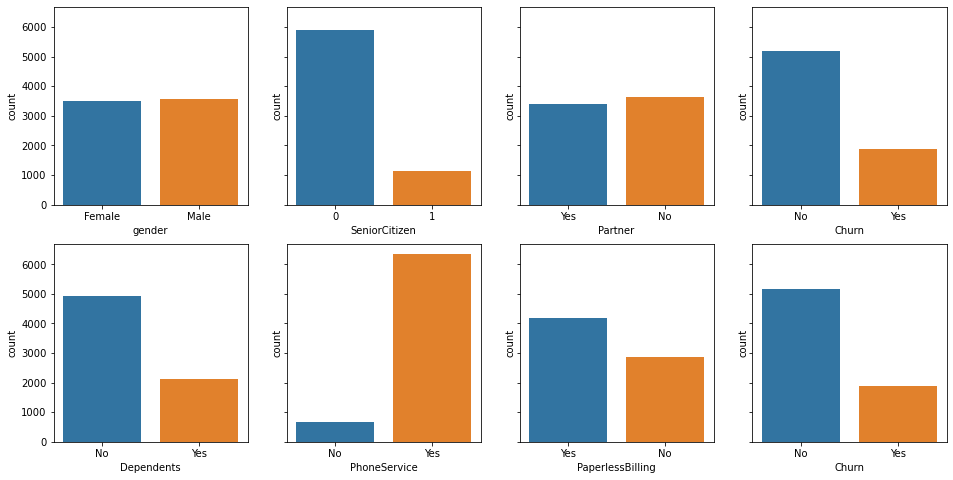

In [82]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8), sharey=True)

sns.countplot("gender", data=data, ax=axes[0,0])
sns.countplot("SeniorCitizen", data=data, ax=axes[0,1])
sns.countplot("Partner", data=data, ax=axes[0,2])
sns.countplot("Churn", data=data, ax=axes[0,3])

sns.countplot("Dependents", data=data, ax=axes[1,0])
sns.countplot("PhoneService", data=data, ax=axes[1,1])
sns.countplot("PaperlessBilling", data=data, ax=axes[1,2])
sns.countplot("Churn", data=data, ax=axes[1,3])

In [20]:
# data.isnull().sum()

In [21]:
# print(f'Max : {data.tenure.max()}, Min : {data.tenure.min()}')
# data.tenure.value_counts()

In [22]:
# print(f'Max : {data.MonthlyCharges.max()}, Min : {data.MonthlyCharges.min()}')
# data.MonthlyCharges.value_counts()

In [43]:
#Replacing spaces with null values in total charges column
# data['TotalCharges'] = data["TotalCharges"].replace(" ",np.nan)

#Dropping null values from total charges column which contain .15% missing data 
# data = data[data["TotalCharges"].notnull()]
# data = data.reset_index()[data.columns]
# data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])
# print(data.TotalCharges.max())
# print(data.TotalCharges.min())

# print(f'Max : {data.TotalCharges.max()}, Min : {data.TotalCharges.min()}')
# data.TotalCharges.value_counts()
# data[data.TotalCharges==data.TotalCharges.min()]

In [53]:
def drop_cols(df):
    return df.drop(columns=['customerID'], axis=1)

def handle_tenure(df):
    bins = (0, 12, 24, 48, 84)
    group_names = ['tenure1', 'tenure2', 'tenure3', 'tenure4']
    df.tenure = pd.cut(df.tenure, bins, labels=group_names)
    return df

def handle_monthly_charges(df):
    df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'])
    bins = (0, 40, 80, 120)
    group_names = ['charge1', 'charge2', 'charge3']
    df.MonthlyCharges = pd.cut(df.MonthlyCharges, bins, labels=group_names)
    return df

def handle_total_charges(df):
    drop_indexes = df[df.TotalCharges == " "].index
    df.drop(drop_indexes, inplace=True)
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
    bins = (0, 1000, 2000, 5000, 10000)
    group_names = ['tcharge1', 'tcharge2', 'tcharge3', 'tcharge4']
    df.TotalCharges = pd.cut(df.TotalCharges, bins, labels=group_names)
    return df

def apply_all(df):
    df = drop_cols(df)
    df = handle_tenure(df)
    df = handle_monthly_charges(df)
    df = handle_total_charges(df)
    return df

In [54]:
data = apply_all(data)

In [57]:
replace_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                'StreamingTV', 'StreamingMovies']

In [58]:
for i in replace_cols :
    data[i] = data[i].replace({'No internet service' : 'No'})
    data[i] = data[i].replace({'No phone service' : 'No'})

In [64]:
data.nunique()

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
tenure              4
PhoneService        2
MultipleLines       2
InternetService     3
OnlineSecurity      2
OnlineBackup        2
DeviceProtection    2
TechSupport         2
StreamingTV         2
StreamingMovies     2
Contract            3
PaperlessBilling    2
PaymentMethod       4
MonthlyCharges      3
TotalCharges        4
Churn               2
dtype: int64

In [62]:
repl_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
             'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

In [63]:
for i in repl_cols :
    data[i] = data[i].replace({'No' : 0, 'Yes' : 1})

In [75]:
sns.barplot(x='Churn', y='TotalCharges', hue='gender', data=data)

ValueError: Length of passed values is 2, index implies 7032.